In [165]:
import h5py
import sympy as sp

g_list = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

g = g_list[1]

file = "../MODELS/POP_objectives_simple_2024-Jan-12_at_15-24.h5"

with h5py.File(file, 'r') as file:
    # Read the string stored under the key 'my_string_name'
    polynomial_str = str(file['gamma_'+g]['pop_lme_objective'][()])
    print("Loaded string:", polynomial_str)

w, a = sp.symbols('w a')
polynomial_expr = sp.sympify(polynomial_str[2:-1])

Loaded string: b'56.73579174892603 - 4.512470369682411*w - 0.08847239989346661*g^2 + 0.08974445825496104*w^2 + 0.17617759519426018*g^4'


In [168]:
def read_pop_lme_objective_from_hdf5(file_path, gamma):
    
    with h5py.File(file_path, 'r') as file:
        # Read the string stored under the key 'my_string_name'
        polynomial_str = str(file['gamma_'+gamma]['pop_lme_objective'][()])

    w, a = sp.symbols('w a')
    polynomial_expr = sp.sympify(polynomial_str[2:-1])
    return(polynomial_expr)

def read_dmd_tf_pop_objective_from_hdf5(file_path, gamma):
    
    with h5py.File(file_path, 'r') as file:
        # Read the string stored under the key 'my_string_name'
        polynomial_str = str(file['gamma_'+gamma]['dmd_ts_pop_objective'][()])

    w, a = sp.symbols('w a')
    polynomial_expr = sp.sympify(polynomial_str[2:-1])
    return(polynomial_expr)



In [52]:
polynomial_expr = read_pop_lme_objective_from_hdf5("../MODELS/POP_objectives_simple_2024-Jan-12_at_15-24.h5", "0.25133")

polynomial_expr

0.17617759519426018*g**4 - 0.08847239989346661*g**2 + 0.08974445825496104*w**2 - 4.512470369682411*w + 56.73579174892603

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from math import sqrt 

def read_polynomial_from_file(file_path):
    """
    Read a polynomial function from a text file and return it as a sympy expression.

    Args:
        file_path (str): The path to the text file containing the polynomial expression.

    Returns:
        sympy expression: The parsed polynomial expression.
    """
    with open(file_path, "r") as file:
        polynomial_str = file.read()
    
    # Parse the polynomial string into a sympy expression
    w, a = sp.symbols('w a')
    polynomial_expr = sp.sympify(polynomial_str)
    
    return polynomial_expr

def plot_contour_plot(polynomial_expr, x_range, y_range, gamma, num_points=100, cmap='viridis'):
    """
    Plot a contour plot (countourplot) of a polynomial function.

    Args:
        polynomial_expr (sympy expression): The polynomial expression to plot.
        x_range (tuple): A tuple (x_min, x_max) specifying the range of x values.
        y_range (tuple): A tuple (y_min, y_max) specifying the range of y values.
        num_points (int): The number of points in each dimension for the grid.
        cmap (str): The colormap to use for the plot.

    Returns:
        None
    """
    x_min, x_max = x_range
    y_min, y_max = y_range

    # Create a grid of x and y values
    x_values = np.linspace(x_min, x_max, num_points)
    y_values = np.linspace(y_min, y_max, num_points)
    X, Y = np.meshgrid(x_values, y_values)

    # Convert the sympy expression to a Python function
    polynomial_func = sp.lambdify((w, a), polynomial_expr, 'numpy')

    # Calculate Z values using the polynomial function
    Z = np.log(polynomial_func(X, Y))

    # Create the contour plot
    plt.figure()
    plt.contourf(X, Y, Z) #,20, cmap=cmap)
    plt.colorbar(label='Function Value')
    plt.xlabel(r'$\omega$')
    plt.ylabel(r'$\sqrt{\gamma}$')
    #plt.title(polynomial_expr)
    plt.plot( 25.126, sqrt(float(gamma)), '+')
    plt.plot( -25.126, sqrt(float(gamma)), '+')
    plt.show()

def plot_obj(file_path):
    polynomial_expr = read_polynomial_from_file(file_path)
    w_range = (-10, 40)  # Specify the x range
    g_range = (-5, 5)  # Specify the y range
    plot_contour_plot(polynomial_expr, w_range, g_range, gamma)

def plot_obj2(gamma):
    polynomial_expr =read_pop_lme_objective_from_hdf5("../MODELS/POP_objectives_simple_2024-Jan-13_at_11-03.h5", gamma)
    w_range = (-40, 40)  # Specify the x range
    g_range = (-5, 5)  # Specify the y range
    plot_contour_plot(polynomial_expr, w_range, g_range, gamma)

def plot_obj3(gamma):
    polynomial_expr =read_dmd_tf_pop_objective_from_hdf5("../MODELS/TS_POP_objectives_simple_2024-Jan-13_at_11-46.h5", gamma)
    w_range = (-40, 40)  # Specify the x range
    g_range = (-5, 5)  # Specify the y range
    plot_contour_plot(polynomial_expr, w_range, g_range, gamma) 

def obj_subplots(frst, lst):

    all_gammas = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]
    gammas = all_gammas[frst:lst]
    rows = len(gammas)

    fig, axes = plt.subplots(rows,2, figsize=(2 * 4, rows * 3))

    w_range = (-10, 40)  # Specify the w range
    a_range = (-5, 5)  # Specify the a = sqrt(g) range
    num_points = 500
    w_min, w_max = w_range
    

    # Create a grid of x and y values
    w_values = np.linspace(w_min, w_max, num_points)
    
    all_a_lims = [3, 3, 5, 5, 5, 8, 15, 17]
    a_lims = all_a_lims[frst:lst]
    #titles = [chr(i) for i in range(ord('a'), ord('h') + 1)]
    titles = [chr(i) for i in range(ord('a'), ord('a') + 17)]
    left_titles = [titles[i-1] for i in range(1, len(titles), 2)][frst:lst]
    right_titles = [titles[i] for i in range(1, len(titles), 2)][frst:lst]

    for ax, gamma, a_lim, title  in zip(axes[:,0],gammas, a_lims, left_titles):

        a_range = (-a_lim, a_lim) 
        a_min, a_max = a_range
        a_values = np.linspace(a_min, a_max, num_points)
   
        polynomial_expr =read_dmd_tf_pop_objective_from_hdf5("../MODELS/TS_POP_objectives_simple_2024-Jan-13_at_11-46.h5", gamma)

        X, Y = np.meshgrid(w_values, a_values)

        # Convert the sympy expression to a Python function
        polynomial_func = sp.lambdify((w, a), polynomial_expr, 'numpy')

        # Calculate Z values using the polynomial function
        Z = np.log(polynomial_func(X, Y))

        ax.contourf(X, Y, Z) #,20, cmap=cmap)
        ax.set_xlabel(r'$\omega$')
        ax.set_ylabel(r'$\sqrt{\gamma}$')    
        ax.plot( 25.126, sqrt(float(gamma)), 'r+')

        ax.set_title('('+title+')'+'\n DMD-TF-POP, '+r'$\gamma^{(sb)}=$'+gamma)

    for ax, gamma, a_lim, title in zip(axes[:,1],gammas, a_lims, right_titles):

        a_range = (-a_lim, a_lim) 
        a_min, a_max = a_range
        a_values = np.linspace(a_min, a_max, num_points)
   
        polynomial_expr =read_pop_lme_objective_from_hdf5("../MODELS/POP_objectives_simple_2024-Jan-13_at_11-03.h5", gamma)

        X, Y = np.meshgrid(w_values, a_values)

        # Convert the sympy expression to a Python function
        polynomial_func = sp.lambdify((w, a), polynomial_expr, 'numpy')

        # Calculate Z values using the polynomial function
        Z = np.log(polynomial_func(X, Y))

        ax.contourf(X, Y, Z) #,20, cmap=cmap)
        ax.set_xlabel(r'$\omega$')
        ax.set_ylabel(r'$\sqrt{\gamma}$')    
        ax.plot( 25.126, sqrt(float(gamma)), 'r+')

        ax.set_title('('+title+')'+'\n Direct POP, '+r'$\gamma^{(sb)}=$'+gamma)

    
    fig.tight_layout()

    return fig


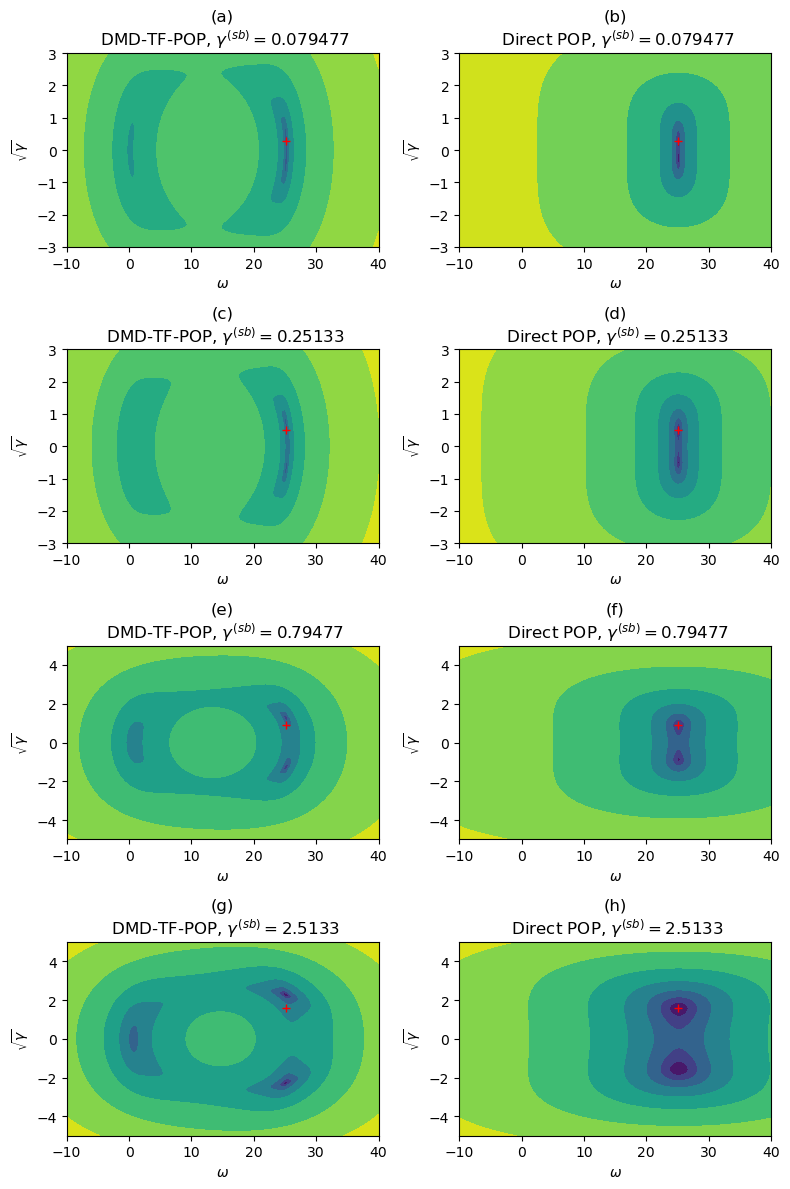

In [176]:
fig = obj_subplots(0,4)
fig.savefig("Objectives_landscapes1.pdf")

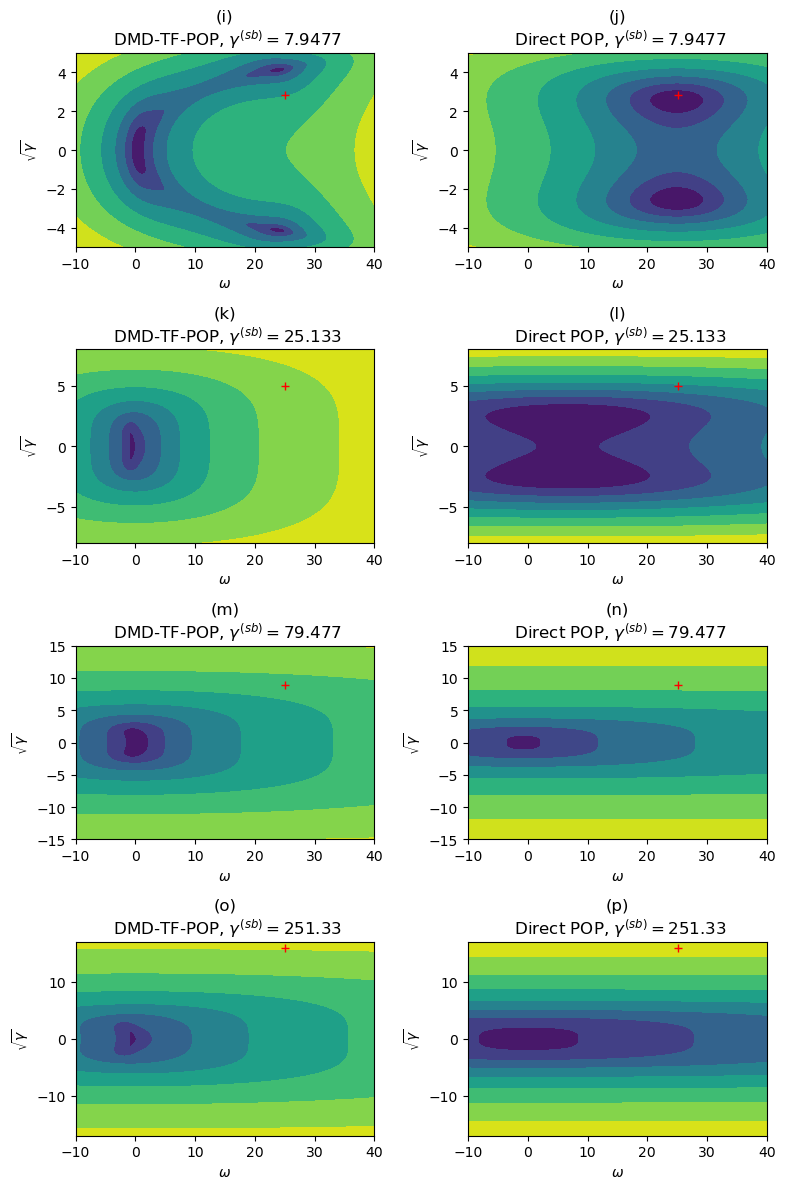

In [177]:
fig = obj_subplots(4,8)
fig.savefig("Objectives_landscapes2.pdf")